In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

# path integral in QM

use path integral to calculate probability amplitude,
$$
\braket{x_1 | e^{- i H t} | x_2} = \int Dx \, e^{i \int dt \, L}
$$

In [2]:
m = 1
k = 1
x_max = 1000
t_max = 0.02

x = np.linspace(-10, 10, 100)

dt = 0.0002
t = np.linspace(0, t_max, int(t_max / dt))
x_path = np.linspace(-x_max, x_max, x_max * 10)

dx = x_path[1] - x_path[0]

def Lagrangian(x, v):
    return m * v**2 / 2 - k * x**2 / 2

In [5]:
dt

0.00020202020202020202

```
paths = []
path_i_index = np.zeros(len(t), dtype=int)
for i in range(len(x_path)**len(t)):
    path_i = []
    add_one = True
    for j in range(len(t)):
        if add_one == True:
            if path_i_index[j] + 1 < len(x_path):
                path_i_index[j] += 1
                add_one = False
            else:
                path_i_index[j] = 0
                add_one = True
    print(f'path_i_index = {path_i_index}')
```

it's clear that exhaustive method won't work, we need Monte Carlo.

## use Monte Carlo method

In [3]:
paths = []
N = 2000
for i in range(N):
    path_i = [0] # x0 = 0
    for j in range(len(t)):
        path_i.append(x_path[random.randint(0, len(x_path))])
    paths.append(path_i)

N_real = len(x_path)**len(t)

amplitude = []
for i in range(len(x)):
    amplitude_xi = 0
    for j in range(N):
        paths[j].append(x[i])
        amplitude_xi_pathj = dt * Lagrangian(paths[j][0], v=0)
        for k in range(1, len(paths[j])):
            amplitude_xi_pathj += dt * Lagrangian(paths[j][k], v=(paths[j][k] - paths[j][k-1]) / dt)
        amplitude_xi_pathj = np.exp(1j * amplitude_xi_pathj)
    
        amplitude_xi += amplitude_xi_pathj
    
    #amplitude_xi = dx**len(x_path) amplitude_xi
    amplitude.append(amplitude_xi)
    print(f'{i / len(x) * 100:.2f}%', end='\r')

amplitude = np.array(amplitude)
rho = (amplitude.real)**2 + (amplitude.imag)**2

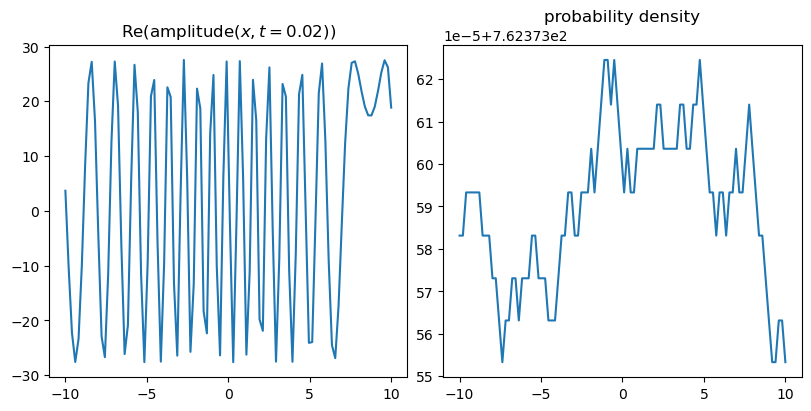

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
axs[0].plot(x, amplitude.real)
axs[0].set_title('$\\mathrm{Re}(\\text{amplitude}(x, t='+f'{t_max}'+'))$')

axs[1].plot(x, rho)
axs[1].set_title('probability density')

plt.show()

## animation of propagation

In [2]:
m = 1
k = 1
x_max = 1000
#t_max = 0.02

x = np.linspace(-10, 10, 100)

#t = np.linspace(0, t_max, 100)
x_path = np.linspace(-x_max, x_max, x_max * 10)

#dt = t[1] - t[0]
dx = x_path[1] - x_path[0]

def Lagrangian(x, v):
    return m * v**2 / 2 - k * x**2 / 2

In [3]:
amplitude_t = []
dt = 0.2 / 1000

t0_mark = time.time()
t_max_values = np.linspace(0, 0.2, 100)
for t_max in t_max_values:
    t = np.linspace(0, t_max, int(t_max / dt))

    paths = []
    N = 5000
    for i in range(N):
        path_i = [0] # x0 = 0
        for j in range(len(t)):
            path_i.append(x_path[random.randint(0, len(x_path))])
        paths.append(path_i)

    N_real = len(x_path)**len(t)

    amplitude = []
    for i in range(len(x)):
        amplitude_xi = 0
        for j in range(N):
            paths[j].append(x[i])
            amplitude_xi_pathj = dt * Lagrangian(paths[j][0], v=0)
            for k in range(1, len(paths[j])):
                amplitude_xi_pathj += dt * Lagrangian(paths[j][k], v=(paths[j][k] - paths[j][k-1]) / dt)
            amplitude_xi_pathj = np.exp(1j * amplitude_xi_pathj)
        
            amplitude_xi += amplitude_xi_pathj
        
        t2_mark = time.time()
        print(f'{t_max / max(t_max_values) * 100:.2f}% + {i / len(x) * 100:.2f}%, time remaining  >~ {
            (((max(t_max_values) - min(t_max_values)) * len(x)) / (t_max * len(x) + (t_max_values[1] - t_max_values[0]) * i) - 1) * (t2_mark - t0_mark) / (60 ** 2):.2f
        }h', end='\r')
        
        #amplitude_xi = dx**len(x_path) amplitude_xi
        amplitude.append(amplitude_xi)
        
    amplitude_t.append(amplitude)
    #print(f'{t_max / max(t_max_values) * 100:.2f}%', end='\r')
    if (i/len(x)*100)%10 > 9 and ((i+1)/len(x)*100)%10 < 1:
        np.save('data/amplitude_t.npy', amplitude_t)
        #np.save('data/rho_t.npy', rho_t)

amplitude_t = np.array(amplitude_t)
rho_t = (amplitude_t.real)**2 + (amplitude_t.imag)**2

np.save('data/amplitude_t.npy', amplitude_t)
np.save('data/rho_t.npy', rho_t)

In [ ]:
# normalization

A = []
for i in range(len(t_max_values)):
    A.append(sum(rho_t[i]) * dx)

amplitude_t_norm = amplitude_t / np.sqrt(A)
rho_t_norm = rho_t / A

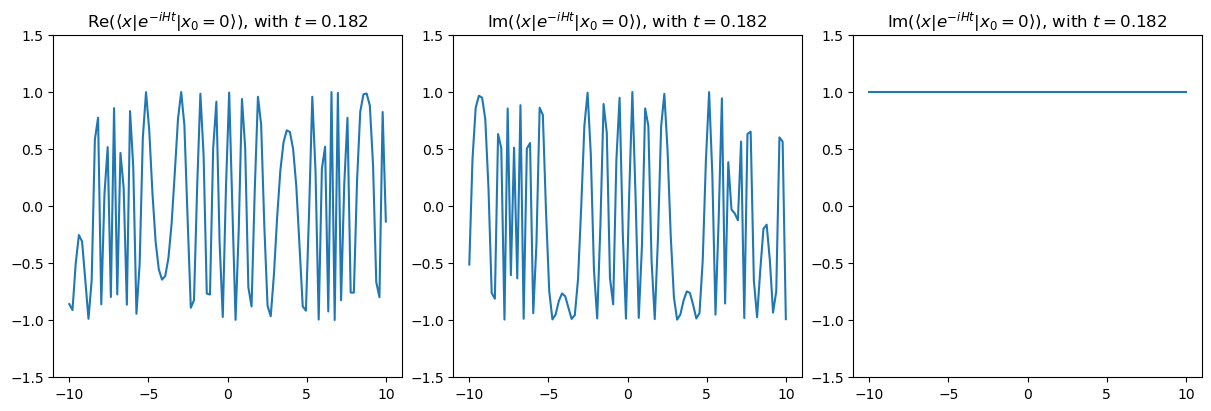

In [67]:
i = 90
fig, axs = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
axs[0].plot(x, amplitude_stabilized[i].real)
axs[0].set_title('$\\mathrm{Re}(\\langle x | e^{- i H t} | x_0 = 0 \\rangle)$, with $t='+f'{t_max_values[i]:.3f}'+'$')
axs[0].set_ylim(-1.5, 1.5)

#axs[1].plot(x, rho_t[i])
#axs[1].set_title('probability density')
#axs[1].set_ylim(0, 1.1)
axs[1].plot(x, amplitude_stabilized[i].imag)
axs[1].set_title('$\\mathrm{Im}(\\langle x | e^{- i H t} | x_0 = 0 \\rangle)$, with $t='+f'{t_max_values[i]:.3f}'+'$')
axs[1].set_ylim(-1.5, 1.5)

axs[2].plot(x, rho_stabilized[i])
axs[2].set_title('$\\mathrm{Im}(\\langle x | e^{- i H t} | x_0 = 0 \\rangle)$, with $t='+f'{t_max_values[i]:.3f}'+'$')
axs[2].set_ylim(-1.5, 1.5)

plt.show()

### animation

In [2]:
t_max_values = np.linspace(0, 0.2, 100)
x = np.linspace(-10, 10, 100)
amplitude_t = np.load('data/amplitude_t (archive).npy')
rho_t = np.load('data/rho_t (archive).npy')

In [3]:
tot_frame_num = len(t_max_values)
default_interval = 1 / 24 * 1000

In [4]:
# stabilize the graph
amplitude_stabilized = []
A = []
for i in range(len(t_max_values)):
    amplitude_stabilized.append(amplitude_t[i] / np.sqrt(np.average(rho_t[i])))
    A.append(max(amplitude_t[i].real))

amplitude_stabilized = np.array(amplitude_stabilized)
rho_stabilized = (amplitude_stabilized.real)**2 + (amplitude_stabilized.imag)**2

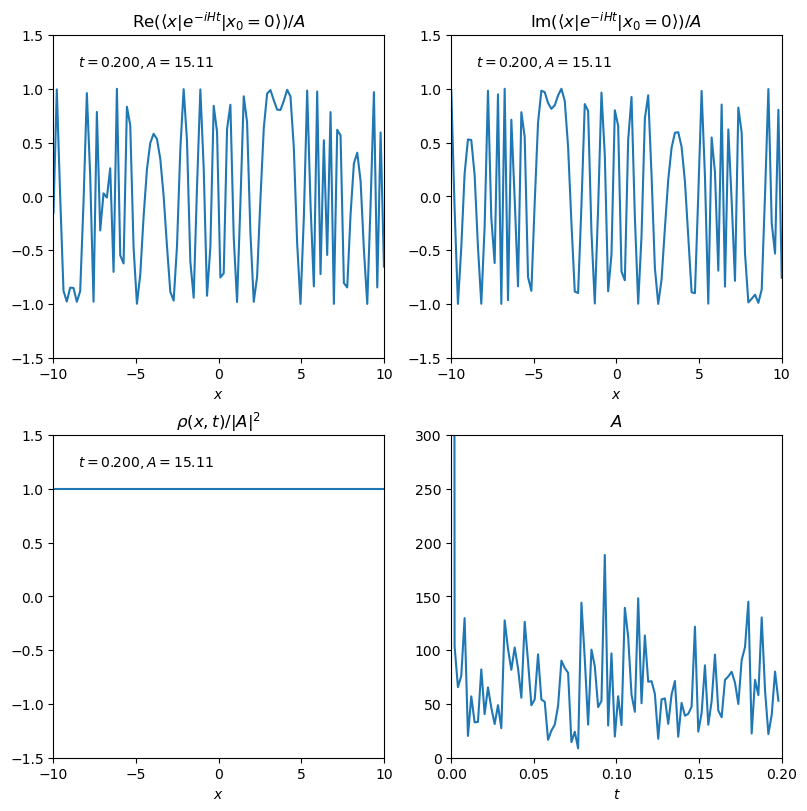

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
# ----------------------------------------------------------------------------------------------------
ani_psi_real, = axs[0][0].plot([], [])
ani_text_0 = axs[0][0].text(-8.5, 1.25, '', ha='left', va='center', fontsize=10)

axs[0][0].set_xlim([-10, 10])
axs[0][0].set_ylim([-1.5, 1.5])
axs[0][0].set_title('$\\mathrm{Re}(\\langle x | e^{- i H t} | x_0 = 0 \\rangle) / A$')
axs[0][0].set_xlabel('$x$')
# ----------------------------------------------------------------------------------------------------
ani_psi_imag, = axs[0][1].plot([], [])
ani_text_1 = axs[0][1].text(-8.5, 1.25, '', ha='left', va='center', fontsize=10)

axs[0][1].set_xlim([-10, 10])
axs[0][1].set_ylim([-1.5, 1.5])
axs[0][1].set_title('$\\mathrm{Im}(\\langle x | e^{- i H t} | x_0 = 0 \\rangle) / A$')
axs[0][1].set_xlabel('$x$')
# ----------------------------------------------------------------------------------------------------
ani_rho, = axs[1][0].plot([], [])
ani_text_2 = axs[1][0].text(-8.5, 1.25, '', ha='left', va='center', fontsize=10)

axs[1][0].set_xlim([-10, 10])
axs[1][0].set_ylim([-1.5, 1.5])
axs[1][0].set_title('$\\rho(x, t) / |A|^2$')
axs[1][0].set_xlabel('$x$')
# ----------------------------------------------------------------------------------------------------
ani_A, = axs[1][1].plot([], [])

axs[1][1].set_xlim([min(t_max_values), max(t_max_values)])
axs[1][1].set_ylim([0, 300])
axs[1][1].set_title('$A$')
axs[1][1].set_xlabel('$t$')
# ----------------------------------------------------------------------------------------------------
def update_data(frame):
    ani_psi_real.set_data(x, amplitude_stabilized[frame].real)
    ani_text_0.set_text(f'$t = {t_max_values[frame]:.3f}, A = {A[frame]:.2f}$')

    ani_psi_imag.set_data(x, amplitude_stabilized[frame].imag)
    ani_text_1.set_text(f'$t = {t_max_values[frame]:.3f}, A = {A[frame]:.2f}$')

    ani_rho.set_data(x, rho_stabilized[frame])
    ani_text_2.set_text(f'$t = {t_max_values[frame]:.3f}, A = {A[frame]:.2f}$')

    ani_A.set_data(t_max_values[:frame], A[:frame])

    print(f'{frame / tot_frame_num * 100:.2f}%', end='\r')
    return ani_psi_real, ani_text_0, ani_psi_imag, ani_text_1, ani_rho, ani_text_2, ani_A

animation = FuncAnimation(
    fig=fig,
    func=update_data,
    frames=tot_frame_num,
    interval=default_interval * 10,
    repeat=True,
)
# Save the animation as a GIF
animation.save('animation_path_integral (stabilized) (Re(psi(x, t)) and Im(psi(x, t))).mp4', writer='ffmpeg')
plt.show()

# path integral in scalar field theory

we choose metric signature as $(+, -, -, -)$.

## eigenstate of the field operator $\phi(x)$

the field operator is,
$$
\phi(x) = \int \frac{d^3 k}{(2 \pi)^{3 / 2} \sqrt{2 \omega_k}} (a_{\vec{k}} e^{- i k \cdot x} + a^\dag_{\vec{k}} e^{i k \cdot x})
$$
the eigenstate is,
$$
\begin{align}
    \ket{f} = \sum_{n = 0}^\infty \int \Big( \prod_i \frac{d^3 k_i}{(2 \pi)^3} \Big) \tilde{f}_n(\vec{k}_1, \cdots) \ket{\vec{k}_1 \vec{k}_2 \cdots} \quad \text{and} \quad \phi(x) \ket{f} &= \int \frac{d^3 k}{(2 \pi)^{3 / 2} \sqrt{2 \omega_k}} \frac{d^3 p}{(2 \pi)^3} \tilde{f}(\vec{p}) (a_{\vec{k}} \ket{\vec{p}} e^{- i k \cdot x} + a^\dag_{\vec{k}} \ket{\vec{p}} e^{i k \cdot x}) \\
    &= \int \frac{d^3 k}{(2 \pi)^{3 / 2} \sqrt{2 \omega_k}} \frac{d^3 p}{(2 \pi)^3} \tilde{f}(\vec{p}) (\delta^{(3)}(\vec{k} - \vec{p}) \ket{0} e^{- i k \cdot x} + a^\dag_{\vec{k}} \ket{\vec{p}} e^{i k \cdot x})
\end{align}
$$